<a href="https://colab.research.google.com/github/pparaskevi/-Segmenting-and-Clustering-Neighbourhoods-in-Toronto/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import random

from geopy.geocoders import Nominatim

from IPython.display import Image
from IPython.core.display import HTML

from IPython.display import display_html
import pandas as pd
import numpy as np

import folium

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [ ]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
source=requests.get(url).text
soup=BeautifulSoup(source,'html5lib')

In [ ]:
table_contents=[]
table=soup.find('table')
for row in table.findALL('td'):
  cell={}
  if row.span.text=='Not assigned':
    pass
  else:
    cell['PostalCode']=row.p.text[:3]
    cell['Borough']=((row.span.text).split('(')[0]
    cell['Neighborhood']=(((((row.span.text).split('(')[1]).strip(')')).replace('/',',')).replace(')',').strip('')
    table_contents.append({'PostalCode':cell['PostalCode'],'Borough':cell['Borough'],'Neighborhood':cell['Neighborhood']})

In [ ]:
df2=pd.DataFrame(table_contents)
df.head()

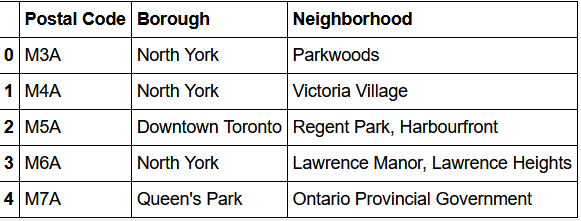

In [ ]:
df = pd.DataFrame(table_contents,columns = ['Postal Code','Borough','Neighborhood'])
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})



In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(12)

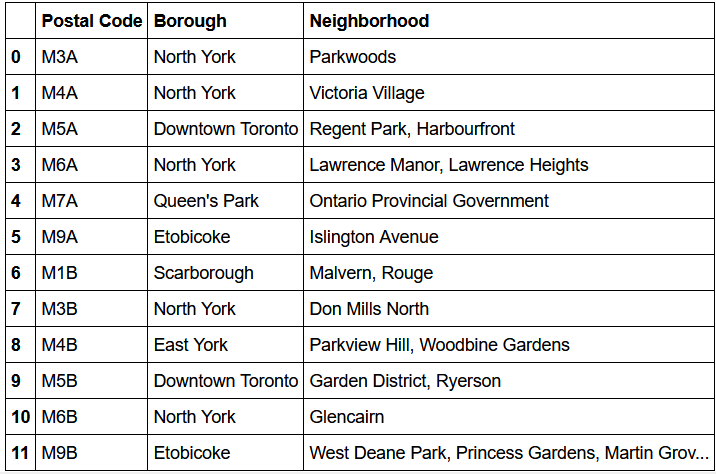

In [ ]:
df.shape

(103, 3)